In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

Data Load

In [9]:
train = pd.read_csv('C:/Users/DAEUN/Downloads/mnist/train.csv')
test = pd.read_csv('C:/Users/DAEUN/Downloads/mnist/test.csv')
submission = pd.read_csv('C:/Users/DAEUN/Downloads/mnist/sample_submission.csv')

In [10]:
train_shape = np.shape(train)
test_shape = np.shape(test)
img_size = (28, 28)

print(train_shape)
print(test_shape)

(60000, 786)
(10000, 785)


Text(0.5, 1.0, 'Digit : 1')

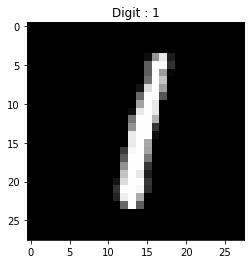

In [11]:
n = np.random.randint(0,train_shape[0]) # Generating Random Number
sample = train.iloc[n,2:]
sample = np.array(sample)
sample = np.reshape(sample,img_size)

plt.imshow(sample, cmap='gray')
plt.title('Digit : ' + str(train.iloc[n,1]))

 Labels and their count :
 {1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421}


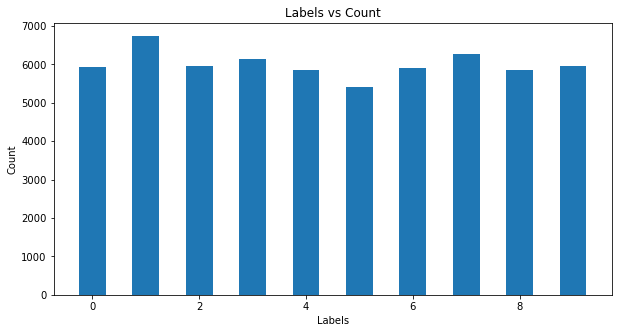

In [12]:
label_count = dict(train.label.value_counts())
print(f' Labels and their count :\n {label_count}')

x = list(label_count.keys())
y = list(label_count.values())

fig = plt.figure(figsize = (10,5))
plt.bar(x,y,width = 0.5)
plt.title('Labels vs Count')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

Preprocessing

In [13]:
train_images = []

for i in range(train_shape[0]):
    data = train.iloc[i,2:]
    data = np.array(data)
    data = np.reshape(data,img_size)
    train_images.append(data)
    
train_images = np.array(train_images)

In [14]:
test_images = []

for i in range(test_shape[0]):
    data = test.iloc[i,1:]
    data = np.array(data)
    data = np.reshape(data,img_size)
    test_images.append(data)

test_images = np.array(test_images)

In [15]:
train_labels = list(train.iloc[:,1])
train_labels = np.array(train_labels)
train_labels = np.reshape(train_labels,(train_shape[0],1))

In [16]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Model

In [47]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(68, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [48]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model.fit(train_images, train_labels, batch_size = 32, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 18s 9ms/step - loss: 1.1436 - accuracy: 0.7837
Epoch 2/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2973 - accuracy: 0.9194
Epoch 3/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2196 - accuracy: 0.9414
Epoch 4/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1675 - accuracy: 0.9575
Epoch 5/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1417 - accuracy: 0.9638
Epoch 6/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1228 - accuracy: 0.9687
Epoch 7/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1091 - accuracy: 0.9718
Epoch 8/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0981 - accuracy: 0.9748
Epoch 9/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0869 - accuracy: 0.9782
Epoch 10/50
1875/1875 [==============================] - 17s 9ms/step - l

In [ ]:
# loss, accuracy = [], []
# for i in range(10):
#     model.fit(train_images, train_labels, epochs=1)
#     loss.append(model.evaluate(train_images, train_labels)[0])
#     accuracy.append(model.evaluate(train_images, train_labels)[1])

# print(accuracy)

In [50]:
myModel = submission.copy()

In [51]:
myModel['label'] = np.argmax(model.predict(test_images),axis=1)

In [52]:
myModel['label'].head()

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64

In [53]:
myModel.to_csv('Answer.csv', index = False)